In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gtd_df = pd.read_csv('globalterrorismdb_0616dist.csv')

/home/salman/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
gtd_df = gtd_df[['region', 'success', 'suicide', 
                 'crit1', 'crit2', 'crit3', 
                 'attacktype1', 'attacktype2', 'attacktype3', 
                 'targtype1', 'targtype2', 'targtype3', 
                 'weaptype1', 'weaptype2', 'weaptype3', 'weaptype4',
                 'nkill', 'nwound',
                 'gname']]

In [4]:
# eliminate rows with unknown attackers
gtd_df = gtd_df[gtd_df['gname']!='Unknown']

In [5]:
# add group id
groupinfo = gtd_df['gname'].value_counts().to_frame('nattack')
groupinfo['gid'] = range(1, len(groupinfo) + 1)
groupinfo.index.name = 'gname'
groupinfo.reset_index(inplace=True)
gtd_df = gtd_df.merge(groupinfo.drop(['nattack'],axis=1), on='gname')

In [6]:
# pick the top n_analysis attackers for the analysis
n_analysis = 20
gtd_sel_df = gtd_df[gtd_df['gid']<=n_analysis]
print 'Number of attacks by these %i groups: %i out of %i' % (n_analysis, len(gtd_sel_df), len(gtd_df))

Number of attacks by these 20 groups: 42117 out of 84850


# Exploratory Data Analysis

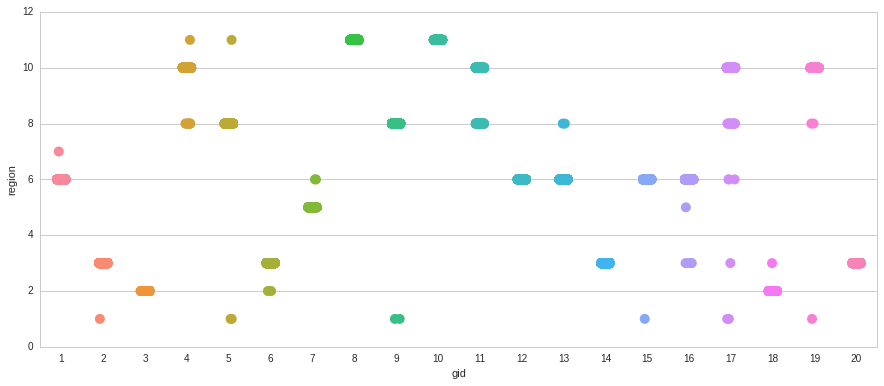

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
sns.stripplot(x='gid', y='region', data=gtd_sel_df, jitter=True, size=10)

In [8]:
# region may be a good feature

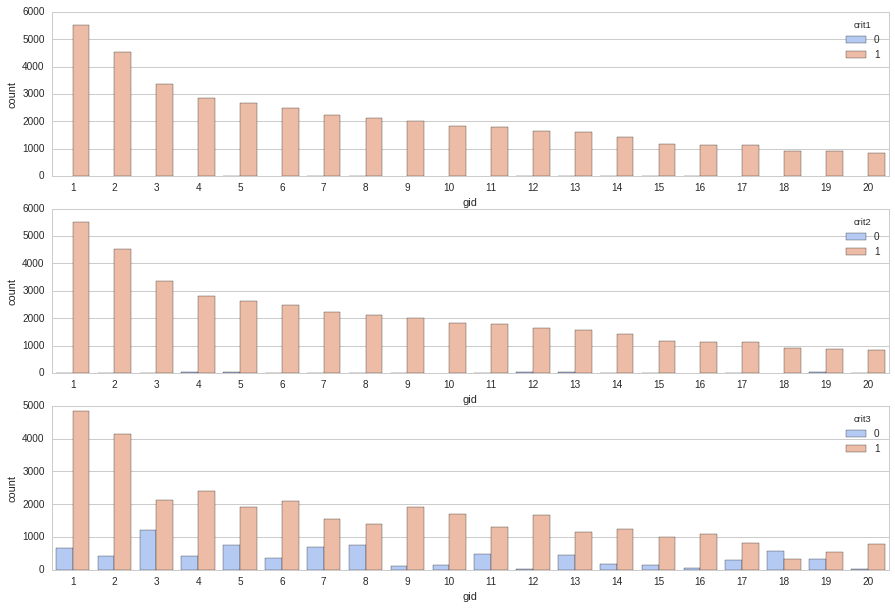

In [9]:
sns.set_style('whitegrid')
f, ax = plt.subplots(3)
f.set_figheight(10)
f.set_figwidth(15)
for n in range(3):
    sns.countplot(x='gid', hue='crit%s'%(n+1), data=gtd_sel_df, ax=ax[n], palette='coolwarm')

In [10]:
# crit3 may be a good feature

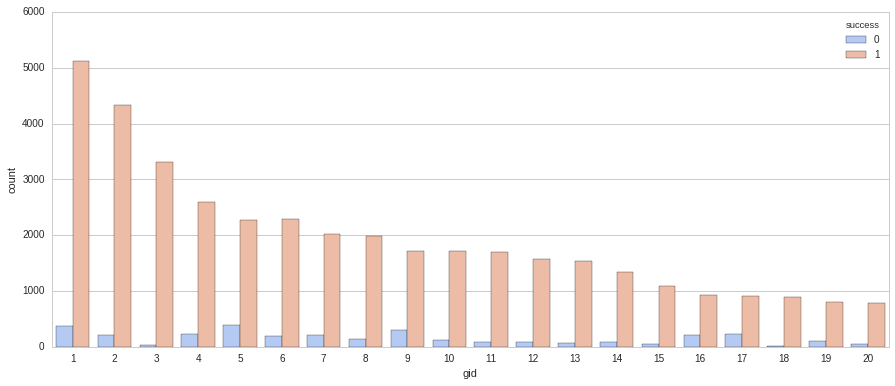

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
sns.countplot(x='gid', hue='success', data=gtd_sel_df, palette='coolwarm')

In [12]:
# success may be a good feature

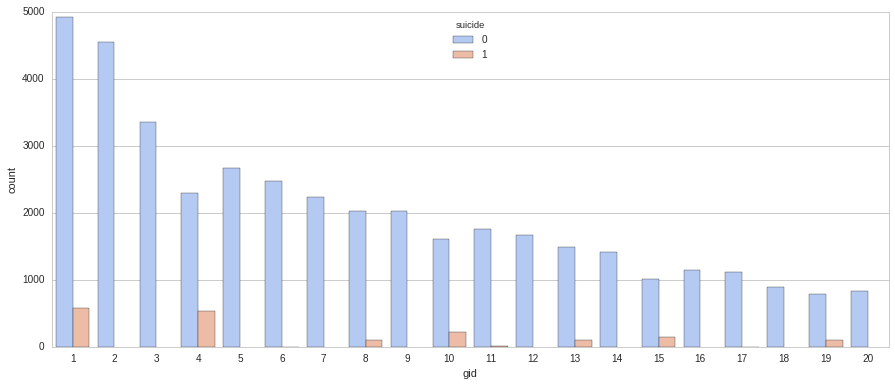

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
sns.countplot(x='gid', hue='suicide', data=gtd_sel_df, palette='coolwarm')

In [14]:
# suicide may be a good feature

In [15]:
attacktype_mat = []
for n in range(3):
    attacktype_mat.append(gtd_sel_df.pivot_table(values='region',index='gid',columns='attacktype%s'%(n+1),aggfunc='count'))
    attacktype_mat[n].fillna(0,inplace=True)

attacktype_mat_all = attacktype_mat[0].add(attacktype_mat[1],fill_value=0).add(attacktype_mat[2],fill_value=0)
attacktype_mat_all_norm = attacktype_mat_all.divide(attacktype_mat_all.sum(axis=1),axis=0)
attacktype_mat_all_norm.head()

,1,2,3,4,5,6,7,8,9
gid,,,,,,,,,
1,0.067656,0.312637,0.395478,0.001856,0.002531,0.096339,0.041674,0.005568,0.076261
2,0.183176,0.252800,0.474632,0.000439,0.005491,0.011860,0.037558,0.000220,0.033824
3,0.038198,0.475679,0.420173,0.000000,0.016413,0.015219,0.027454,0.000000,0.006864
4,0.026816,0.108282,0.639511,0.001358,0.004073,0.116090,0.016633,0.000339,0.086897
5,0.321108,0.113024,0.431886,0.001123,0.002994,0.015344,0.108907,0.000749,0.004865


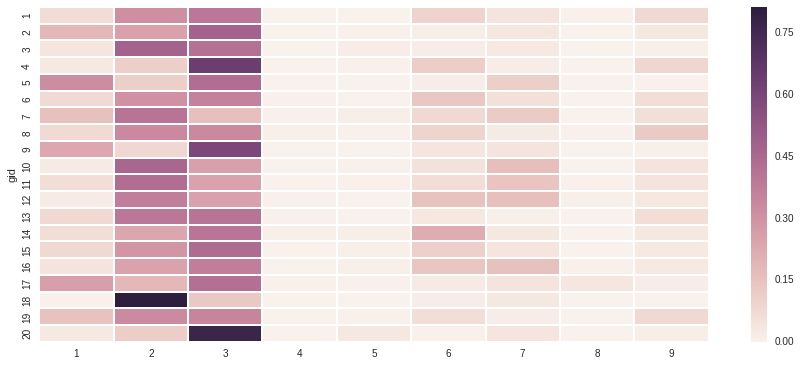

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(data=attacktype_mat_all_norm,linecolor='white',linewidths=1)

In [17]:
# attacktype may be a good feature

In [18]:
targtype_mat = []
for n in range(3):
    targtype_mat.append(gtd_sel_df.pivot_table(values='region',index='gid',columns='targtype%s'%(n+1),aggfunc='count'))
    targtype_mat[n].fillna(0,inplace=True)

targtype_mat_all = targtype_mat[0].add(targtype_mat[1],fill_value=0).add(targtype_mat[2],fill_value=0)
targtype_mat_all_norm = targtype_mat_all.divide(targtype_mat_all.sum(axis=1),axis=0)
targtype_mat_all_norm.head()

,1,2,3,4,6,7,8,9,10,11,...,13,14,15,16,17,18,19,20,21,22
gid,,,,,,,,,,,,,,,,,,,,,
1,0.034248,0.129380,0.315047,0.166482,0.004757,0.009513,0.021088,0.001110,0.003330,0.000317,...,0.00111,0.237038,0.014111,0.005074,0.007293,0.000317,0.010782,0.022990,0.002061,0.000476
2,0.161339,0.162861,0.133290,0.093281,0.004131,0.012829,0.024353,0.005219,0.015003,0.001087,...,0.00000,0.187649,0.006958,0.009350,0.006306,0.002392,0.043705,0.005001,0.123288,0.000000
3,0.078940,0.044385,0.036938,0.366696,0.000894,0.005660,0.000894,0.001192,0.015788,0.000000,...,0.00000,0.109324,0.000000,0.016086,0.002085,0.000000,0.042895,0.001787,0.274948,0.000596
4,0.052118,0.033831,0.136849,0.202987,0.000914,0.002438,0.003962,0.000914,0.013715,0.000000,...,0.00640,0.380981,0.025907,0.000000,0.095398,0.000000,0.010972,0.017068,0.010058,0.003353
5,0.196448,0.058824,0.198668,0.293008,0.004440,0.002960,0.001850,0.000000,0.002220,0.000740,...,0.00000,0.163152,0.001850,0.002220,0.029227,0.000000,0.028117,0.014058,0.001110,0.000000


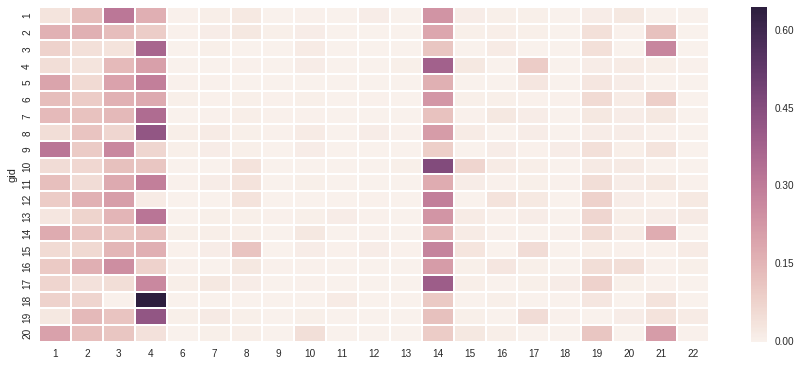

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(data=targtype_mat_all_norm, linewidths=1, linecolor='white')

In [20]:
# targtype may be a good feature

In [21]:
weaptype_mat = []
for n in range(4):
    weaptype_mat.append(gtd_sel_df.pivot_table(values='region',index='gid',columns='weaptype%s'%(n+1),aggfunc='count'))
    weaptype_mat[n].fillna(0,inplace=True)
    
weaptype_mat_all = weaptype_mat[0].add(weaptype_mat[1],fill_value=0).add(weaptype_mat[2],fill_value=0).add(weaptype_mat[3],fill_value=0)
weaptype_mat_all_norm = weaptype_mat_all.divide(weaptype_mat_all.sum(axis=1),axis=0)
weaptype_mat_all_norm.head()

,1.0,2.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0
gid,,,,,,,,,,
1,0.0,0.005830,0.371981,0.442279,0.039314,0.020157,0.000333,0.000167,0.000666,0.119274
2,0.0,0.000819,0.418714,0.458231,0.045250,0.014537,0.000000,0.000614,0.000410,0.061425
3,0.0,0.000000,0.518837,0.409141,0.046537,0.000277,0.000000,0.000831,0.000000,0.024377
4,0.0,0.000319,0.128868,0.646890,0.011483,0.014673,0.001595,0.000319,0.001914,0.193939
5,0.0,0.000000,0.390958,0.468716,0.110307,0.002893,0.000362,0.000000,0.000362,0.026401


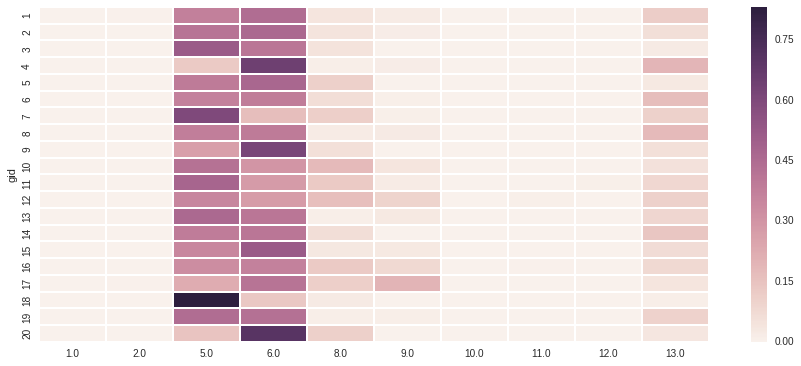

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(data=weaptype_mat_all_norm, linewidths=1, linecolor='white')

In [23]:
gtd_sel_df['nvict'] = gtd_sel_df['nkill'] + gtd_sel_df['nwound']

/home/salman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


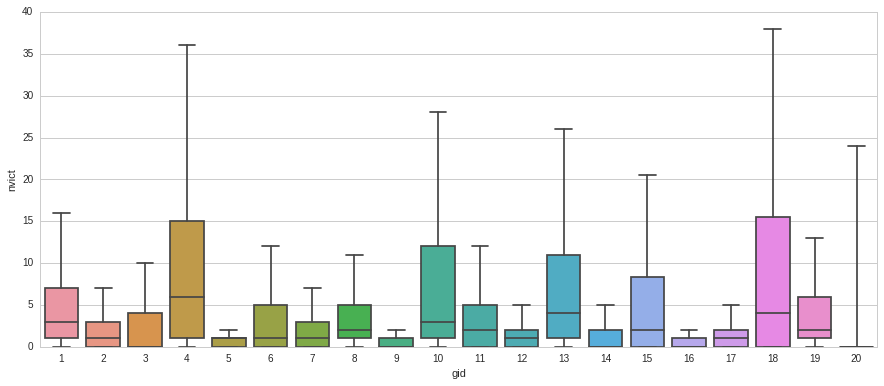

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
sns.boxplot(x='gid', y='nvict', data=gtd_sel_df, showfliers=False)

In [25]:
# nvict may be a good feature

# Summary of Features

In [26]:
# feature we want to use:
#     region: must be converted into dummy cols (using built-in get_dummies)
#     crit3: no need for further processing
#     success: no need for further processing
#     suicide: no need for further processing
#     attacktype 1-3: must be converted into dummy cols (using a custom-made function)
#     targtype 1-3: must be converted into dummy cols (using a custom-made function)
#     weaptype 1-4: must be converted into dummy cols (using a custom-made function)
#     nvict: no need for further processing

# Data Pre-Processing

In [27]:
# customized function to create dummy columns
# I use my function, instead of the built-in get_dummies(), since the info on a categorical feature, 
# e.g. attacktype, is spread across multiple columns, e.g. attacktype1 to attacktype4

def add_dummycols(df, catcolname, catcolindecies, dummycolname):
    # determine all the elements of the category
    types = set()
    for n in catcolindecies:
        types = types.union(set(df['%s%s'%(catcolname,n)].value_counts().keys()))
    types = [int(m) for m in types]
    # process and add the dummy columns
    for m in types:
        df['%s%s'%(dummycolname,m)] = False
        for n in catcolindecies:
            df['%s%s'%(dummycolname,m)] += (df['%s%s'%(catcolname,n)]==m)
        df['%s%s'%(dummycolname,m)] = (df['%s%s'%(dummycolname,m)]).astype(int)

In [28]:
# add dummy cols - built-in func
regiondummies = pd.get_dummies(gtd_sel_df['region'], prefix='reg', prefix_sep='-')
gtd_sel_df = pd.concat([gtd_sel_df,regiondummies], axis=1)
# add dummy cols - my custom func
add_dummycols(gtd_sel_df, 'targtype', [1,2,3], 'targ-')
add_dummycols(gtd_sel_df, 'weaptype', [1,2,3,4], 'weap-')
add_dummycols(gtd_sel_df, 'attacktype', [1,2,3], 'attack-')

/home/salman/anaconda2/lib/python2.7/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [29]:
# replace NaN in the nvict column by the average nvict for that group

mean_group_vict = gtd_sel_df[['gid','nvict']].groupby(by='gid').mean().astype(int)

def impute_nvict(cols):
    gid = cols[0]
    nvict = cols[1]
    
    if pd.isnull(nvict):
        return mean_group_vict.loc[gid]['nvict']
    else:
        return nvict
    
gtd_sel_df['nvict'] = gtd_sel_df[['gid','nvict']].apply(impute_nvict, axis=1)

# Model Training

In [30]:
# build X and y dataframes
X = gtd_sel_df.drop(['region','crit1','crit2',
                     'attacktype1','attacktype2','attacktype3',
                     'targtype1','targtype2','targtype3',
                     'weaptype1','weaptype2','weaptype3','weaptype4',
                     'nkill','nwound',
                     'gname','gid'], axis=1)
y = gtd_sel_df['gid']

In [31]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [32]:
X.describe()

,success,suicide,crit3,nvict,reg-1,reg-2,reg-3,reg-5,reg-6,reg-7,...,weap-13,attack-1,attack-2,attack-3,attack-4,attack-5,attack-6,attack-7,attack-8,attack-9
count,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,...,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000,42117.000000
mean,0.924567,0.043142,0.808581,5.634542,0.000214,0.100838,0.220172,0.053185,0.262697,0.000024,...,0.102571,0.108222,0.320678,0.418216,0.002422,0.006126,0.076359,0.066790,0.003158,0.049149
std,0.264091,0.203178,0.393423,16.374463,0.014617,0.301118,0.414368,0.224405,0.440104,0.004873,...,0.303402,0.310665,0.466743,0.493272,0.049153,0.078028,0.265574,0.249661,0.056107,0.216181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1362.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
nest_list = range(5,101,5)
misclass = []
for n, nest in enumerate(nest_list):
    # train the model
    rfc = RandomForestClassifier(n_estimators=nest)
    rfc.fit(X_train, y_train)
    # make predictions
    y_pred = rfc.predict(X_test)
    # calculate misclassification
    misclass.append(100.0*sum(y_test<>y_pred)/len(y_test))
    # progress report
    print 'model %2i out of %2i, nest = %3i, misclass rate = %4.1f%%' %((n+1),len(nest_list),nest,misclass[-1])

model  1 out of 20, nest =   5, misclass rate = 32.3%
model  2 out of 20, nest =  10, misclass rate = 32.0%
model  3 out of 20, nest =  15, misclass rate = 32.1%
model  4 out of 20, nest =  20, misclass rate = 32.0%
model  5 out of 20, nest =  25, misclass rate = 32.1%
model  6 out of 20, nest =  30, misclass rate = 31.6%
model  7 out of 20, nest =  35, misclass rate = 31.9%
model  8 out of 20, nest =  40, misclass rate = 31.9%
model  9 out of 20, nest =  45, misclass rate = 31.8%
model 10 out of 20, nest =  50, misclass rate = 31.8%
model 11 out of 20, nest =  55, misclass rate = 31.8%
model 12 out of 20, nest =  60, misclass rate = 31.8%
model 13 out of 20, nest =  65, misclass rate = 31.8%
model 14 out of 20, nest =  70, misclass rate = 31.9%
model 15 out of 20, nest =  75, misclass rate = 31.8%
model 16 out of 20, nest =  80, misclass rate = 32.0%
model 17 out of 20, nest =  85, misclass rate = 31.7%
model 18 out of 20, nest =  90, misclass rate = 31.7%
model 19 out of 20, nest =  

In [35]:
# pick the best estimator
n_best = np.argmin(misclass)

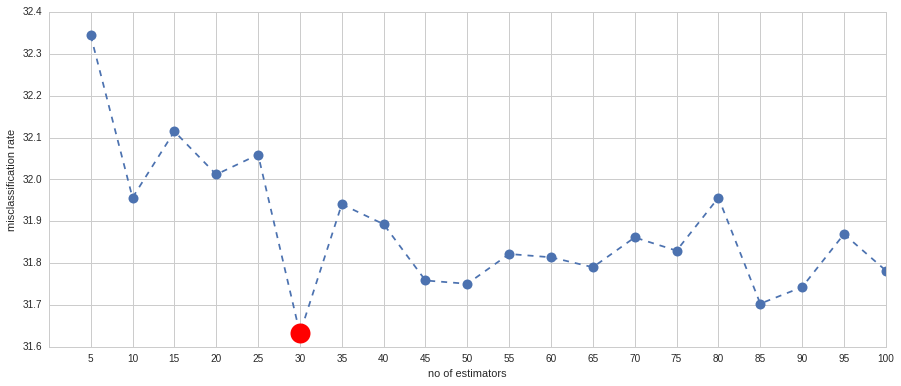

In [36]:
plt.figure(figsize=(15,6))
plt.plot(nest_list, misclass, 'o--', markersize=10) 
plt.plot(nest_list[n_best], misclass[n_best],'ro', markersize=20, label='optimal no of estimators')
plt.ylabel('misclassification rate')
plt.xlabel('no of estimators')
plt.xticks(nest_list)
plt.show()

In [37]:
# conclusion
print 'THE OPTIMAL NO OF RANDOM FOREST ESTIMATORS: %i' %nest_list[n_best]

THE OPTIMAL NO OF RANDOM FOREST ESTIMATORS: 30


In [39]:
# print some reports for the best estimator
from sklearn.metrics import classification_report, confusion_matrix
# train the model
nest = nest_list[n_best]
rfc = RandomForestClassifier(n_estimators=nest)
rfc.fit(X_train, y_train)
# make predictions
y_pred = rfc.predict(X_test)
# final report
print '-- Classification report ------------------'
print(classification_report(y_test,y_pred))
print '-- Confusion matrix ------------------'
print(confusion_matrix(y_test,y_pred))

-- Classification report ------------------
             precision    recall  f1-score   support

          1       0.64      0.81      0.72      1637
          2       0.60      0.86      0.71      1387
          3       0.90      0.98      0.94      1010
          4       0.76      0.82      0.79       836
          5       0.71      0.72      0.72       799
          6       0.51      0.37      0.43       725
          7       1.00      1.00      1.00       713
          8       0.82      0.85      0.84       620
          9       0.67      0.69      0.68       664
         10       0.82      0.79      0.80       530
         11       0.58      0.58      0.58       509
         12       0.43      0.49      0.46       481
         13       0.48      0.30      0.37       477
         14       0.49      0.26      0.34       426
         15       0.46      0.21      0.28       355
         16       0.46      0.28      0.35       353
         17       0.71      0.60      0.65       350
 